# Churn (INSAID)

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.

### Importing Libraries

In [209]:
import numpy as np
import pandas as pd

### Importing the data

In [210]:
# use these links to do so:
df = pd.read_csv('Churn.csv')

### Understanding the data

In [211]:
#first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [212]:
df.shape

(7043, 21)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [214]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [215]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [216]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data Manipulation

In [217]:
#Remove customerID column
df1 = df.iloc[:,1:]

In [218]:
#convert all the categorical variables into numerical variables
from sklearn.preprocessing import LabelEncoder


In [219]:
list=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
encoder = LabelEncoder()
for i in list:
    df1[i]=encoder.fit_transform(df[i])

In [220]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [221]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


### Data Visualization

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

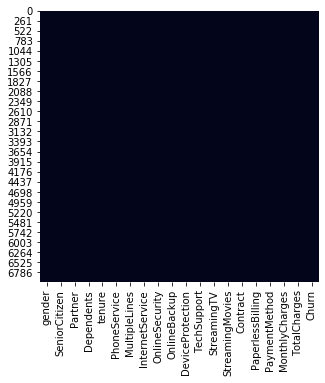

In [223]:
#to see any null values is present or not
plt.figure(figsize=(5,5))
sns.heatmap(df1.isnull(),cbar=False)

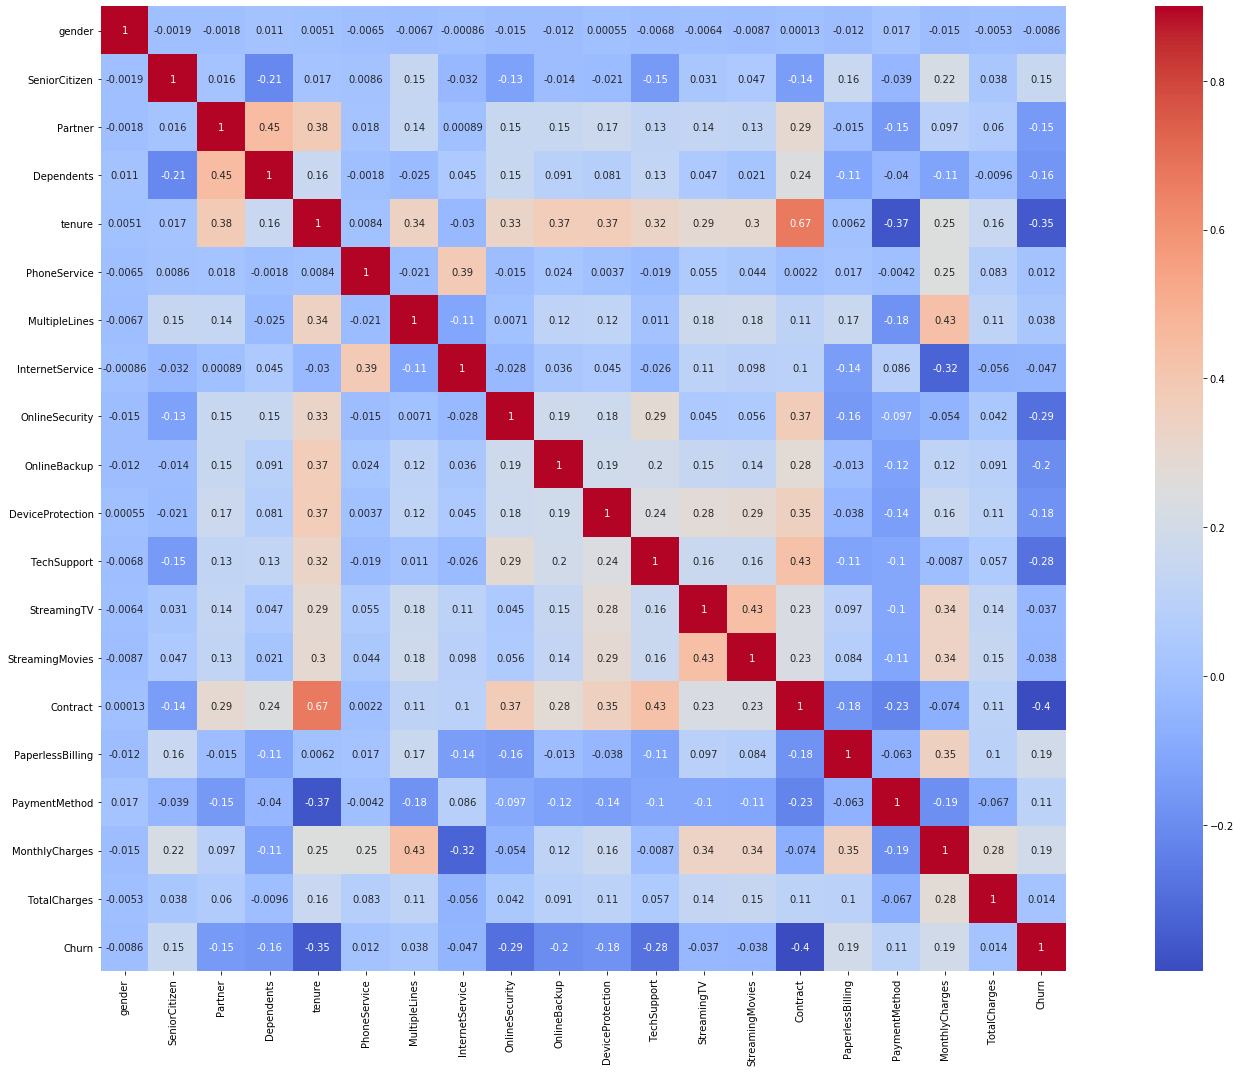

In [224]:
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(df1.corr(),cmap="coolwarm",square=True,vmax=0.9,annot=True)
fig.tight_layout()

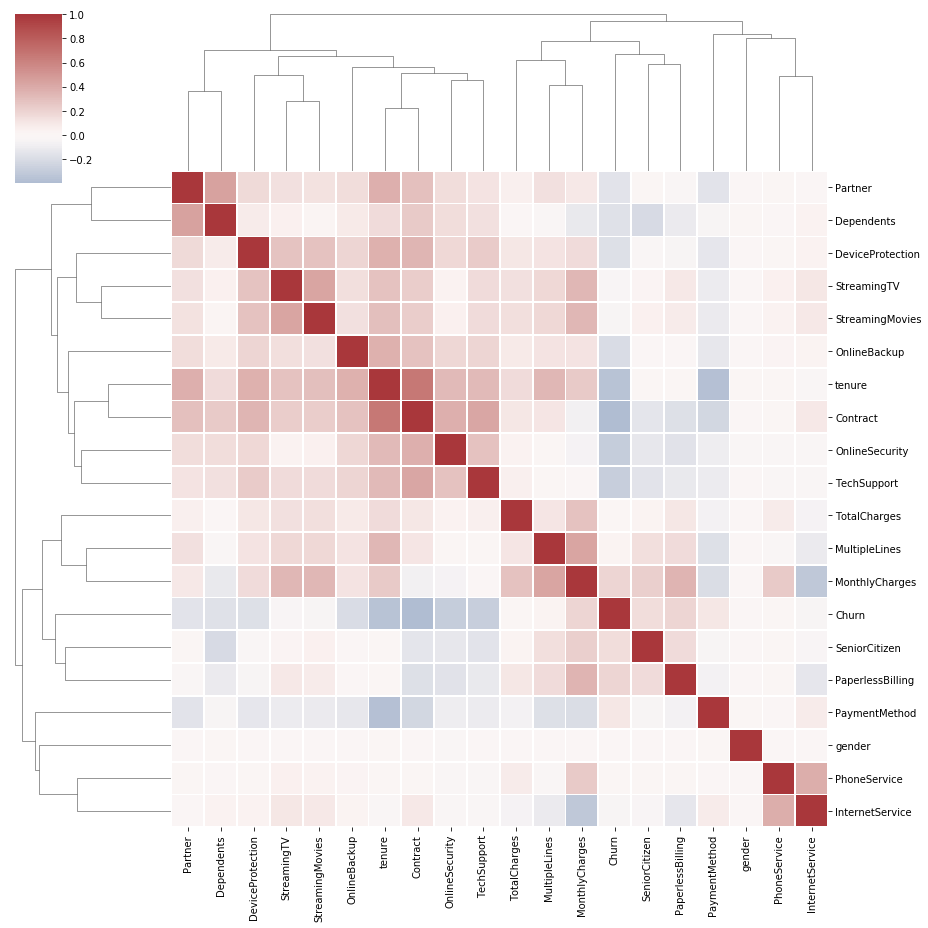

In [267]:
sns.clustermap(df1.corr(), center=0, cmap="vlag",linewidths=.75, figsize=(13, 13))

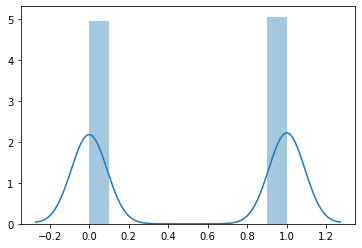

In [226]:
#to gender ratio (Male vs Female)
sns.distplot([df1.gender])

In [227]:
#both male and female is equally distrubuted

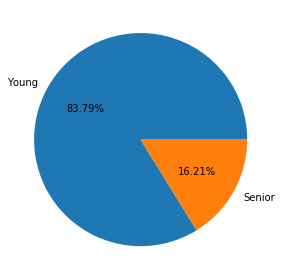

In [228]:
plt.pie(df1['SeniorCitizen'].value_counts(),labels=['Young','Senior'],autopct='%.2f%%')
plt.tight_layout()

In [229]:
#83.79% of people are younger and 16.21% people are seniorcitizens

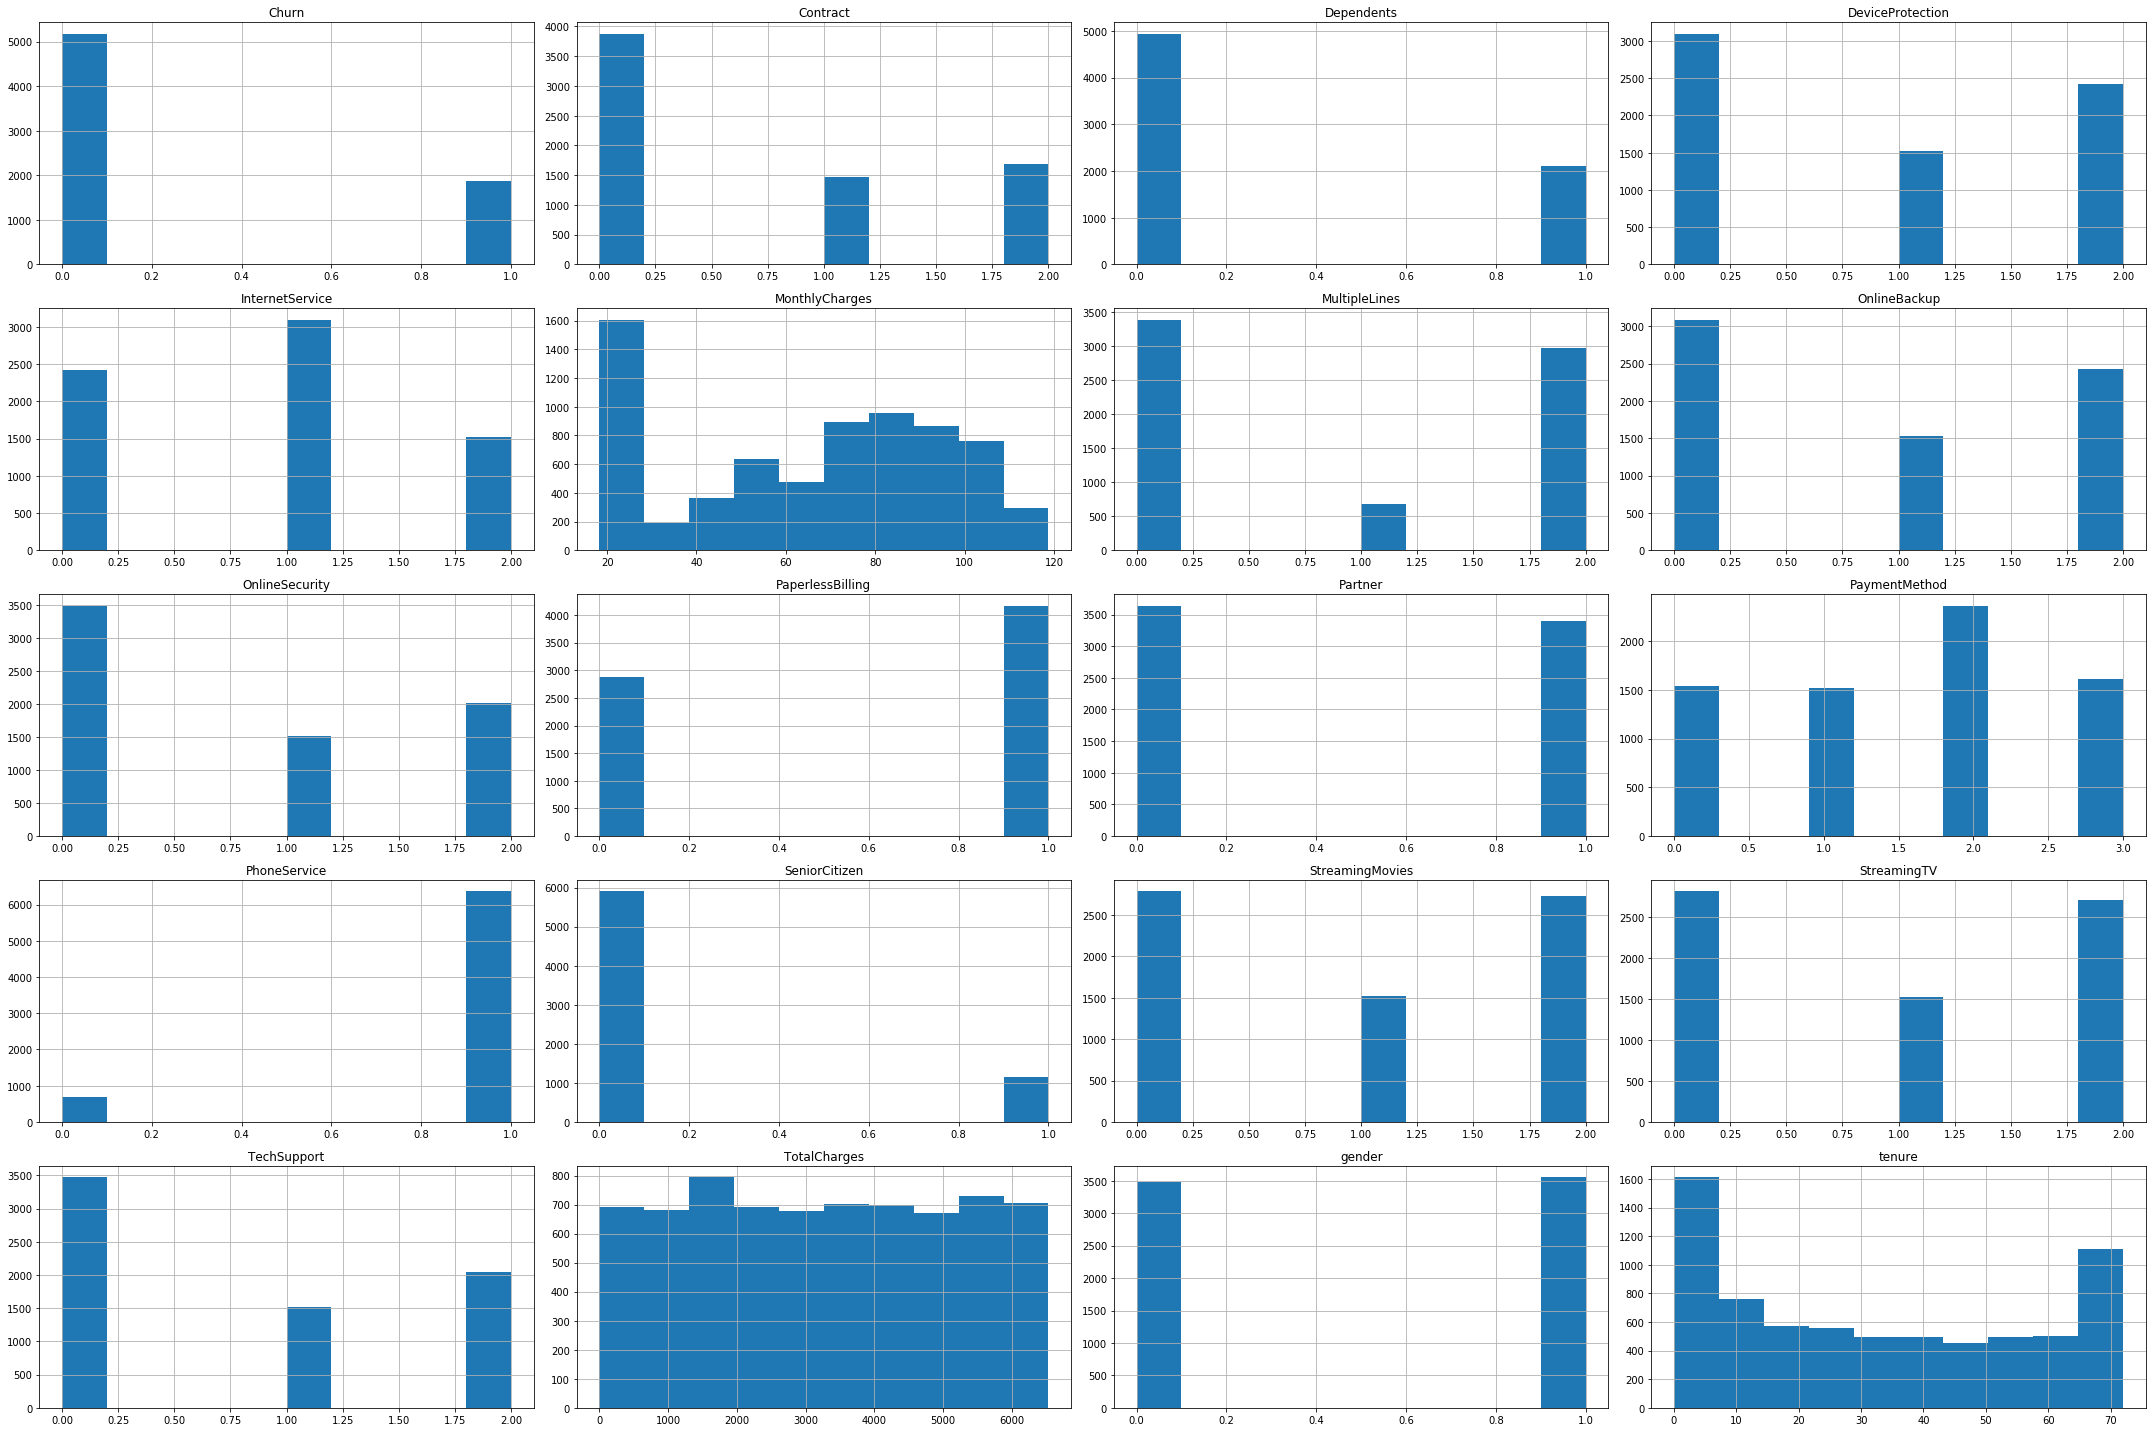

In [230]:
df1.hist(figsize= (30,20))
plt.tight_layout()

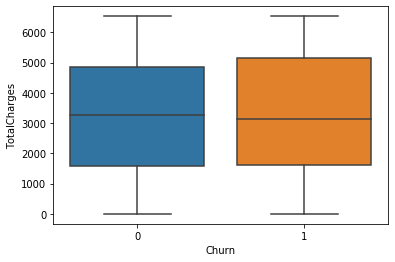

In [231]:
sns.boxplot(x='Churn', y='TotalCharges', data=df1)

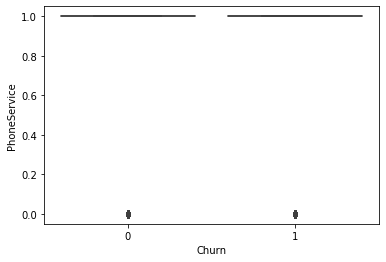

In [232]:
sns.boxplot(x='Churn', y='PhoneService', data=df1)

In [233]:
#Too much Outlier is occured 

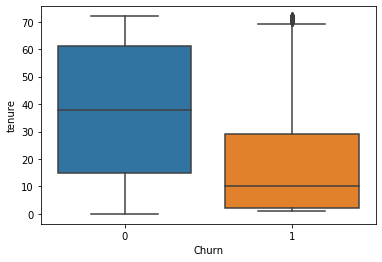

In [234]:
sns.boxplot(x='Churn', y='tenure', data=df1)

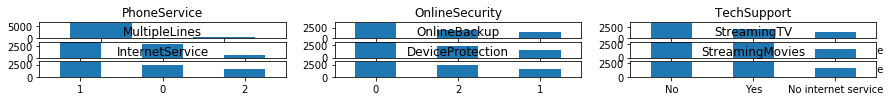

In [235]:
service_data = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,1))

for i, item in enumerate(service_data):
    if i < 3:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df1[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
        
    ax.set_title(item)

In [236]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [237]:
from sklearn.preprocessing import MinMaxScaler

In [238]:
y = df1['Churn'].values
X = df1.drop(columns = ['Churn'])

In [239]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [240]:
#Training the model
#Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [241]:
print('shape of x_train:',X_train.shape)
print('shape of y_train:',X_test.shape)

shape of x_train: (4930, 19)
shape of y_train: (2113, 19)


## Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
lreg=LogisticRegression()

In [244]:
lreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [245]:
pred_lreg=lreg.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score

In [247]:
accuracy_score(Y_test, pred_lreg) #prediction accuracy

0.7983909133932797

## Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
dtf=DecisionTreeClassifier(max_depth=5,random_state=0)

In [250]:
dtf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [251]:
pred_dt=dtf.predict(X_test)

In [252]:
accuracy_score(pred_dt,Y_test) ##prediction accuracy

0.7903454803596782

## SVM

In [253]:
from sklearn.svm import SVC

In [254]:
model = SVC()

In [255]:
model_svm = SVC(kernel='linear') 


In [256]:
model_svm.fit(X_train,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [257]:
pred_svm = model_svm.predict(X_test)


In [258]:
accuracy_score(Y_test, pred_svm) #prediction accuracy

0.7998106956933271

### Model Evaluation

In [259]:
from sklearn.metrics import confusion_matrix 

In [260]:
confusion_matrix(Y_test,pred_lreg)

array([[1401,  159],
       [ 267,  286]], dtype=int64)

In [261]:
confusion_matrix(Y_test,pred_dt)

array([[1424,  136],
       [ 307,  246]], dtype=int64)

In [262]:
confusion_matrix(Y_test,pred_svm)

array([[1407,  153],
       [ 270,  283]], dtype=int64)

### Final Conclusions

Based on the three models(i.e 1. Logistic Regression, 2. Decision Tree, 3. SVM) created by me, the SVM model had the highest Accuracy and precision score.

To make the customers stay, the telecom company can offer lower monthly charges for yearly contracts